# Generate Quantum Music with superposition


### We use qiskit library and run it in the IBM quantum computer

We take two sets of frequency and make a superposition of these two to generate a new set of notes and play it with windows beep sound.

In [56]:

import winsound
import time
import qiskit
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import Aer, IBMQ, execute,QuantumCircuit
from qiskit.tools.visualization import circuit_drawer


Here are the set of pitches we that will be used

In [105]:
#C, Db, D, Eb, E, F, Gb, G, Ab, A, Bb, B = 65,69,73,77,82,87,92,98,103,110,116,123

In [114]:
#C, Db, D, Eb, E, F, Gb, G, Ab, A, Bb, B = 4186,4435,4699,4978,5274,5588,5920,6272,6645,7040,7459,7902

In [57]:
#C, Db, D, Eb, E, F, Gb, G, Ab, A, Bb, B = 261,277,294,311,330,349,370,392,415,440,466,494

In [123]:
C, Db, D, Eb, E, F, Gb, G, Ab, A, Bb, B =523,554,587,622,659,698,740,784,830,880,932,987

Now, we create two sets of pitches from the above sets.

In [124]:
tunes = [[[C,G,F,E,D,C,C],[0.5,1,0.5,0.5,0.5,1,1]]]
tunes.append([[E,E,F,G,G,F,E],[0.5]*7])
print("---------------- Tune 1 with duration ----------------")
print(tunes[0])
print()

print("---------------- Tune 2 with duration ----------------")
print(tunes[1])
print()

---------------- Tune 1 with duration ----------------
[[523, 784, 698, 659, 587, 523, 523], [0.5, 1, 0.5, 0.5, 0.5, 1, 1]]

---------------- Tune 2 with duration ----------------
[[659, 659, 698, 784, 784, 698, 659], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]



### Play each of the tune individually

In [125]:
def play_tune(tune):    
    
    for idx,pitch in enumerate(tune[0]):        
        duration_milliseconds = int(tune[1][idx]*1000)
        winsound.Beep(pitch,duration_milliseconds)       

play_tune(tunes[0])
play_tune(tunes[1])

### Now, we take the same number of qubits as the number of pitches in a tune. We will have the same number of classical bits.

In [126]:
tune_len = len(tunes[0][0])
q = QuantumRegister(tune_len)
c = ClassicalRegister(tune_len)
qc = QuantumCircuit(q,c)

The Hadamard H gate is used to build the superposition circuit, therefore the qc.h instructions below. One H gate serves as the representation for each note in the music. The two indices for the songs list, 0 and 1, are superimposed by an H-gate. The numbers 0 and 1 stand for the first and second songs, respectively.

A quantum state in a superposition of 0 and 1 is seen by the qc.measure instruction, which then transmits the result to a classical register. There is a 50/50 possibility that the outcome will be 0 or 1.

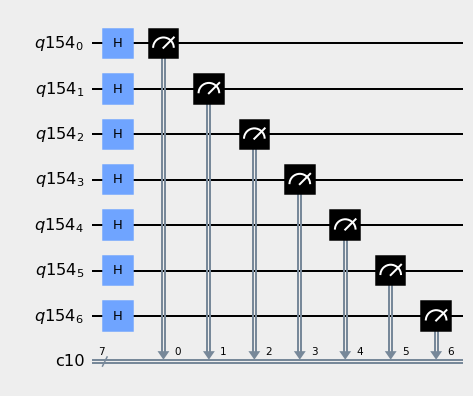

In [127]:
for reg in range(0,len(tunes[0][0])):
        qc.h(q[reg])        
        qc.measure(q[reg],c[reg])
diagram = circuit_drawer(qc)
# diagram.show()
circuit_drawer(qc, output='mpl', style={'backgroundcolor': '#EEEEEE'})

We use the statevector simulator to run the circuit. We use IBM quantum computer to execute the circuit.

The output of collapse tune superposition() is the superposition of the collapsed tunes' indexes, from note 1 to note 7.

In [128]:
#IBMQ.enable_account('IBM API KEY')

In [129]:
def make_tune_superposition():
    
    provider = IBMQ.get_provider(hub='ibm-q')
    quantum_backend = Aer.get_backend('statevector_simulator')
    circuit_result = execute(qc, quantum_backend, shots=1)
    tune_indices = list(circuit_result.result().get_counts(qc))[0]   
    return(tune_indices[::-1])
print("Collapsed tune index superposition = ",make_tune_superposition())

Collapsed tune index superposition =  1000001


From left to right, multiply for each of these three and read off the tune index, using 0 for the note from tunes[0] and 1 for tunes[1]. Depending on which tune is chosen after the superposition collapse, the following function reads from one of the two tunes.

In [130]:
def convert_to_tune(collapse, tunes):
    collapsed_tune = [[],[]]
    for idx,tune_index in enumerate(collapse):
        collapsed_tune[0].append(tunes[int(tune_index)][0][idx])
        collapsed_tune[1].append(tunes[int(tune_index)][1][idx])
    return(collapsed_tune)

Finally, we play the tune from the tune of superposition.

In [131]:
collapse = make_tune_superposition()
new_tune = convert_to_tune(collapse, tunes)

print("---------------- Collapsed tune superposition ----------------")
print(new_tune[0])
print()
print("---------------- Duration ----------------")
print(new_tune[1])
play_tune(new_tune)

---------------- Collapsed tune superposition ----------------
[523, 784, 698, 784, 587, 698, 659]

---------------- Duration ----------------
[0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5]


This illustrates a crucial point: in the quantum circuit, the tune is neither tune 0 nor tune 1. It combines the two in some way. However, it is impossible to directly see this combination. A tensor product of the indices of the two tunes may be used to mathematically express the superposition of the two tunes:

$$ T = \frac{\left|0\right\rangle+\left|1\right\rangle}{\sqrt{2}}\otimes\frac{\left|0\right\rangle+\left|1\right\rangle}{\sqrt{2}}\otimes\frac{\left|0\right\rangle+\left|1\right\rangle}{\sqrt{2}}\otimes\frac{\left|0\right\rangle+\left|1\right\rangle}{\sqrt{2}}\otimes\frac{\left|0\right\rangle+\left|1\right\rangle}{\sqrt{2}}\otimes\frac{\left|0\right\rangle+\left|1\right\rangle}{\sqrt{2}}\otimes\frac{\left|0\right\rangle+\left|1\right\rangle}{\sqrt{2}}$$